In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
#import file and reading few lines
numbers = pd.read_csv('train.csv')
numbers.head(10)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
numbers.shape

(60000, 785)

In [4]:
#checking datatype
numbers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 359.3 MB


In [5]:
numbers.describe(percentiles = [0.05,0.10,0.25,0.50,0.75,0.90,0.99])

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,60000.000000,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0000,60000.0,60000.0,60000.0,60000.0
mean,4.453933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.200433,0.088867,0.045633,0.019283,0.015117,0.0020,0.0,0.0,0.0,0.0
std,2.889270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.042472,3.956189,2.839845,1.686770,1.678283,0.3466,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
5%,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
10%,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
90%,8.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0


In [6]:
#checking for null values
round(100*(numbers.isnull().sum()/(len(numbers.index))),2).sort_values(ascending = False)

label    0.0
19x12    0.0
19x14    0.0
19x15    0.0
19x16    0.0
        ... 
10x12    0.0
10x13    0.0
10x14    0.0
10x15    0.0
28x28    0.0
Length: 785, dtype: float64

In [7]:
# let us check unique entries of label column
np.unique(numbers['label'])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [8]:
numbers['label'].value_counts()

label
1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: count, dtype: int64

Text(0, 0.5, 'Frequency')

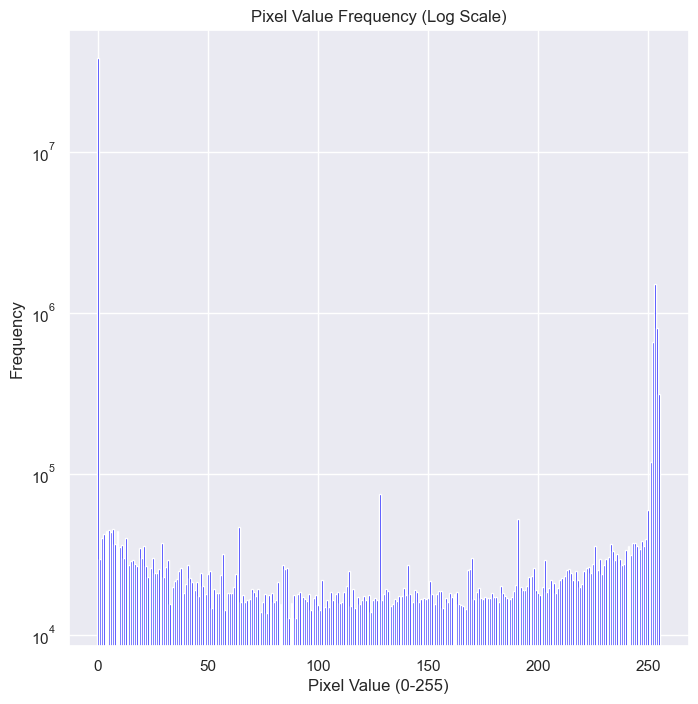

In [9]:
y = pd.value_counts(numbers.values.ravel()).sort_index()
N = len(y)
x = range(N)
width =0.9
plt.figure(figsize=[8,8])
plt.bar(x, y, width, color="blue")
plt.title('Pixel Value Frequency (Log Scale)')
plt.yscale('log')
plt.xlabel('Pixel Value (0-255)')
plt.ylabel('Frequency')

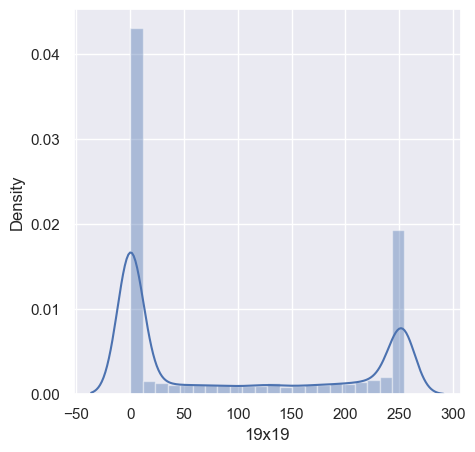

In [10]:
plt.figure(figsize=(5,5))
sns.distplot(numbers['19x19'])
plt.show()

<Axes: xlabel='20x19', ylabel='Density'>

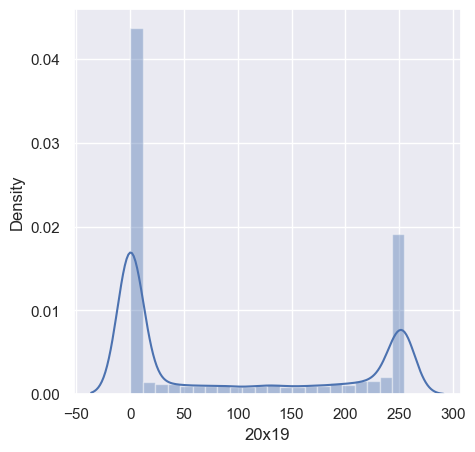

In [11]:
plt.figure(figsize=(5,5))
sns.distplot(numbers['20x19'])

<Axes: xlabel='label', ylabel='20x18'>

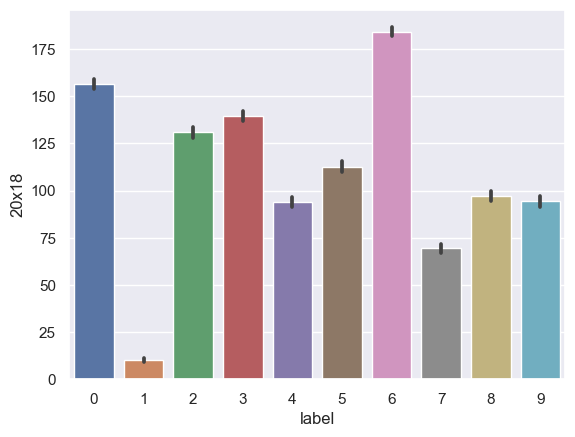

In [12]:
sns.barplot(x='label', y='20x18', data=numbers)

<Axes: xlabel='label', ylabel='12x15'>

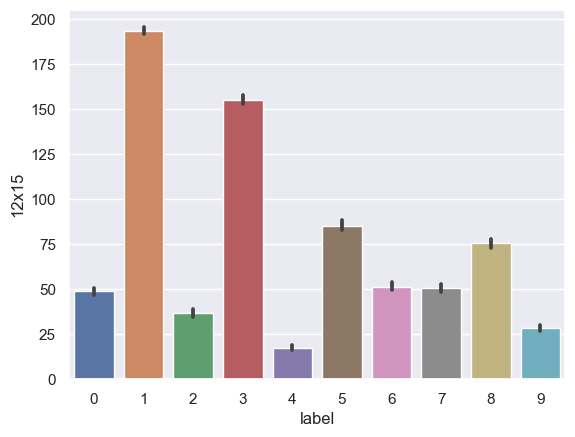

In [13]:
sns.barplot(x='label', y='12x15', data=numbers)

Text(0.5, 1.0, 'Digit 0')

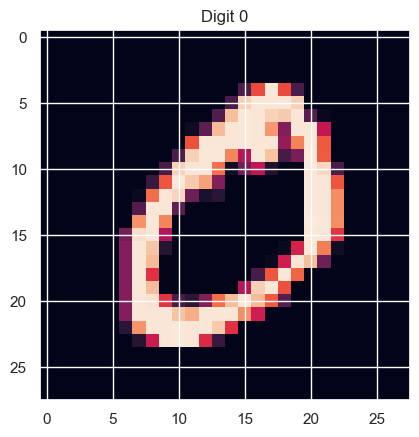

In [14]:
zero = numbers.iloc[1, 1:]
zero = zero.values.reshape(28,28)
plt.imshow(zero)
plt.title("Digit 0")

Text(0.5, 1.0, 'Digit 1')

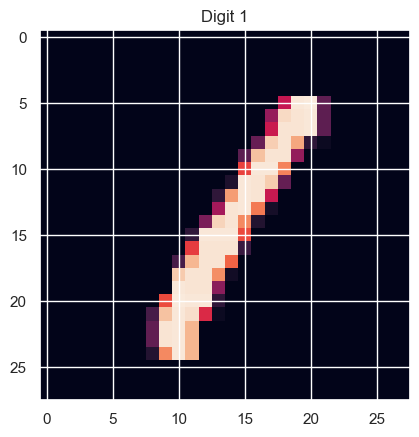

In [15]:
one = numbers.iloc[3, 1:]
one = one.values.reshape(28,28)
plt.imshow(one)
plt.title("Digit 1")

Text(0.5, 1.0, 'Digit 4')

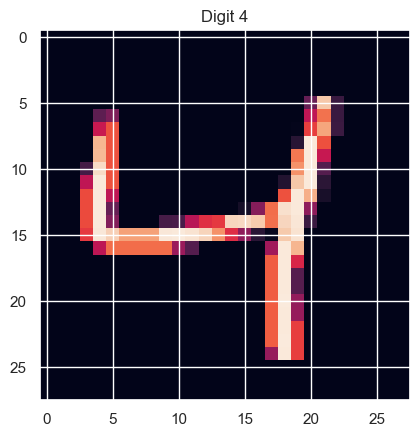

In [16]:
four = numbers.iloc[2, 1:]
four = four.values.reshape(28,28)
plt.imshow(four)
plt.title("Digit 4")

Text(0.5, 1.0, 'Digit 9')

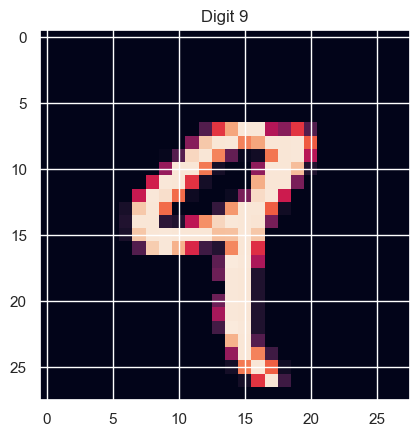

In [17]:
nine = numbers.iloc[4, 1:]
nine = nine.values.reshape(28,28)
plt.imshow(nine)
plt.title("Digit 9")

<Axes: >

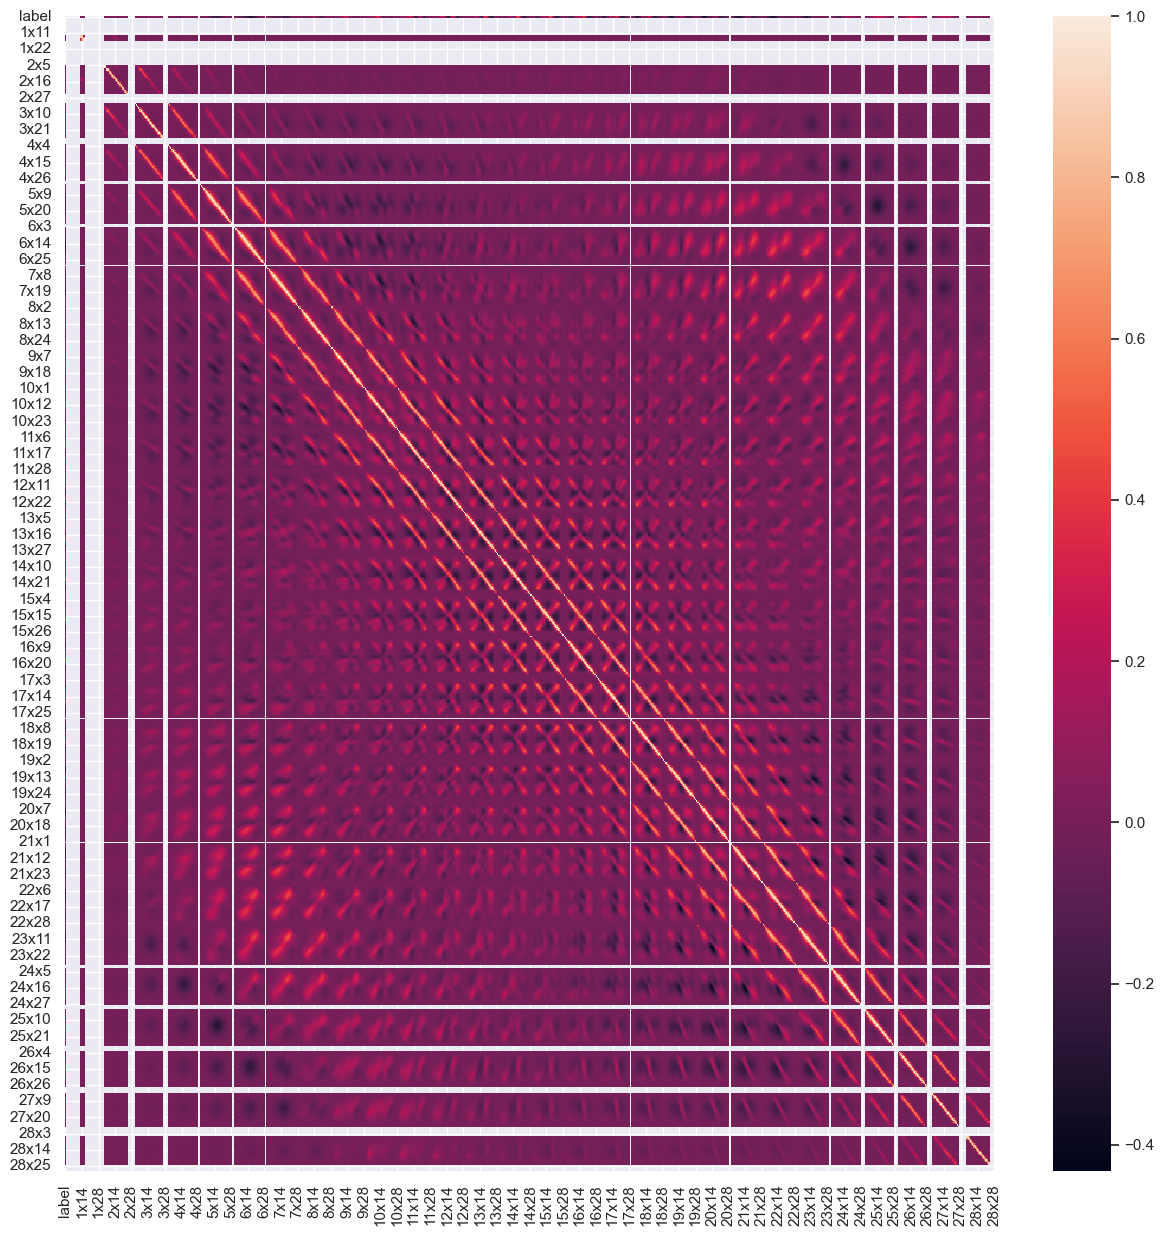

In [18]:
plt.figure(figsize=(15,15))
sns.heatmap(data=numbers.corr(),annot=False)

In [19]:
# average feature values
pd.set_option('display.max_rows', 999)
round(numbers.drop('label', axis=1).mean(), 2).sort_values(ascending = False)

15x16    139.55
16x16    139.11
15x17    137.10
16x15    135.69
8x16     135.40
8x17     133.34
8x15     132.76
22x15    131.84
16x17    131.80
22x14    130.37
15x15    130.27
14x17    129.81
15x18    128.09
17x16    127.43
8x18     126.68
14x18    126.60
17x15    126.47
21x16    125.56
23x14    125.30
8x14     125.00
21x15    124.95
22x16    124.87
7x16     124.10
14x16    123.97
9x14     123.39
16x14    123.20
9x15     123.04
9x17     122.73
22x13    122.59
23x13    122.52
9x16     122.34
9x18     122.14
7x17     121.71
16x18    121.44
17x17    121.06
23x15    120.61
9x13     119.44
7x15     118.51
21x17    118.22
20x16    117.80
13x18    117.58
21x14    117.34
9x19     116.26
20x17    115.92
17x14    115.86
18x16    115.44
15x14    115.42
8x19     113.55
23x12    113.10
13x17    113.04
18x15    112.62
22x12    112.46
20x15    112.45
18x17    112.24
19x16    112.20
7x18     112.03
8x13     111.58
14x15    111.37
19x17    111.35
17x18    111.22
10x19    111.08
10x18    110.88
10x13   

In [20]:
# splitting into X and y
X = numbers.drop("label", axis = 1)
y = numbers['label']

In [21]:
# scaling the features
X_scaled = scale(X)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=0.2,test_size = 0.8, random_state = 101)

In [22]:
print('X_train shape:',X_train.shape)
print('y_train shape:',y_train.shape)
print('X_test shape:',X_test.shape)
print('y_test shape:',y_test.shape)

X_train shape: (12000, 784)
y_train shape: (12000,)
X_test shape: (48000, 784)
y_test shape: (48000,)


In [23]:
# linear model
model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)

# predict
y_pred = model_linear.predict(X_test)

In [24]:
# confusion matrix and accuracy, precision, recall

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.911375 

[[4558    3   28   10   10   42   40    2   24    4]
 [   1 5296   21   18    3    9    5   10   19    6]
 [  53   46 4362   74   40   10   45   40   57   11]
 [  33   32  161 4328    8  177    8   46   99   34]
 [  10   23   80    7 4323    6   20   25   16  171]
 [  47   26   52  223   32 3738   97    9   83   22]
 [  44   18   71    2   39   54 4510    2   18    0]
 [  15   29   82   40   83   12    1 4589   13  170]
 [  39  139  136  200   17  183   42   24 3848   37]
 [  17   21   23   59  190   28    1  191   36 4194]]


In [25]:
#precision, recall and f1-score
scores=metrics.classification_report(y_test, y_pred, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
print(scores)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      4721
           1       0.94      0.98      0.96      5388
           2       0.87      0.92      0.89      4738
           3       0.87      0.88      0.88      4926
           4       0.91      0.92      0.92      4681
           5       0.88      0.86      0.87      4329
           6       0.95      0.95      0.95      4758
           7       0.93      0.91      0.92      5034
           8       0.91      0.82      0.87      4665
           9       0.90      0.88      0.89      4760

    accuracy                           0.91     48000
   macro avg       0.91      0.91      0.91     48000
weighted avg       0.91      0.91      0.91     48000



In [26]:
# non-linear model
# using poly kernel, C=1, default value of gamma

# model
non_linear_model_poly = SVC(kernel='poly')

# fit
non_linear_model_poly.fit(X_train, y_train)

# predict
y_pred = non_linear_model_poly.predict(X_test)

In [27]:
# confusion matrix and accuracy, precision, recall

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9031041666666667 

[[4357    0   11    4   45    9   28    2  260    5]
 [   0 5268   12    6   17    0    2    4   72    7]
 [   8   26 3951   52  143    2   16   22  509    9]
 [   0   20   57 4288   25   51    3   32  390   60]
 [   3   16   27    3 4414    4    6    3   21  184]
 [   4    3   11   89   81 3563   52    6  449   71]
 [   6   11    8    2  116   37 4378    3  197    0]
 [   4   43   19    6  191    4    0 4283   87  397]
 [   6   22   21   30   32   43    4    3 4472   32]
 [   4   12   13   38  161    9    0   54   94 4375]]


In [28]:
# non-linear model
# using rbf kernel, C=1, default value of gamma

# model
non_linear_model = SVC(kernel='rbf')

# fit
non_linear_model.fit(X_train, y_train)

# predict
y_pred = non_linear_model.predict(X_test)

In [29]:
# confusion matrix and accuracy, precision, recall

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9415416666666667 

[[4600    2   25    5    4   13   33   10   27    2]
 [   1 5290   29   15    6    1    6   24    8    8]
 [  19   16 4482   37   24    3   34   81   36    6]
 [   6   20   99 4493    6   89    4  117   68   24]
 [   3   16   69    3 4393   12   20   41    9  115]
 [  17   12   24  102   14 3989   88   40   23   20]
 [  21   11   32    0   18   41 4563   54   18    0]
 [   5   29   50   10   43    3    0 4777    8  109]
 [  18   65   60   69   18   93   24   36 4250   32]
 [   8    9   25   61   90   15    1  169   25 4357]]


In [30]:
#precision, recall and f1-score
scores=metrics.classification_report(y_test, y_pred, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
print(scores)

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      4721
           1       0.97      0.98      0.97      5388
           2       0.92      0.95      0.93      4738
           3       0.94      0.91      0.92      4926
           4       0.95      0.94      0.95      4681
           5       0.94      0.92      0.93      4329
           6       0.96      0.96      0.96      4758
           7       0.89      0.95      0.92      5034
           8       0.95      0.91      0.93      4665
           9       0.93      0.92      0.92      4760

    accuracy                           0.94     48000
   macro avg       0.94      0.94      0.94     48000
weighted avg       0.94      0.94      0.94     48000



In [31]:
# specify model
model = SVC(kernel="rbf")    

# fit the model
model.fit(X_train, y_train)  

SVC()

In [32]:
predictions = model.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predictions))

0.9415416666666667
